<a href="https://colab.research.google.com/github/aguaranguay/se-ales/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Taller 1**
Alejandro Guaranguay 818037


#**2. Conceptos Básicos de Señales**
###i) Evaluar la expresión $\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t\right )}} \cos{\left (2t \right )} \delta\left(2 t - 2 \pi\right)dt \rightarrow 1$ Nota: Consultar las propiedas de selectividad y escala en el tiempo de la funcion impulso unitario. Comprobar el resultado en simulacion con la librería SymPy.






##Solución
Teniendo en cuenta las propiedades de la función delta de Dirac se tiene que:
$$\int_{-\infty}^{\infty}f(t) \delta\left(t - t_o\right)dt = f(t_o) \rightarrow 2 $$

$$\delta\left(at - t_o\right) = \mid a \mid^{-1}\delta(x-\frac{t_o}{a}) \rightarrow 3 $$ 

Tomando $\delta\left(2 t - 2 \pi\right)$ de la Ecuacion 1 y aplicándo propiedades de la Ecuacion 3 se tiene:

$$\delta\left(2 t - 2 \pi\right) = \frac{1}{2}\delta(t-\pi) $$
Reemplazando en la ecuación 1:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt $$
Ahora, aplicando la propiedad de la ecuación 2:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt = \frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi) = \frac{\pi^2}{2} $$

##Simulación 

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t = sp.symbols('t', real = True)
d = sp.DiracDelta((2*t)-2*(sp.pi))
x = (t**2)*(sp.exp(-(sp.sin(t))))*(sp.cos(2*t))

xi = x*d
xii = sp.integrate(xi,(t,-(sp.oo),sp.oo))
xii

$$\frac{\pi^{2}}{2}$$

---




###ii) Sea $x(t) = u(t- t_o)- u(t- nt_o)- k\delta (t- mt_o)$ .Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty}{x(t)}dt = 0 $ . Comprobar el resultado en simulacion con la librería SymPy.


##Solución
Hacemos:

$$a = u(t- t_o)- u(t- nt_o)$$ 

y:

$$ b = k\delta (t- mt_o)$$

entonces:

$$x(t) = a-b$$

Por lo tanto:

$$\int_{-\infty}^{\infty}{x(t)}dt = \int_{-\infty}^{\infty}adt-\int_{-\infty}^{\infty}bdt = 0$$ 

Resolviendo $\int_{-\infty}^{\infty}adt$ :

$$\int_{-\infty}^{\infty}adt = \int_{-\infty}^{\infty}u(t- t_o)- u(t- nt_o)dt = \int_{t_o}^{nt_o}dt = \mid nt_o-t_o\mid = \mid t_o(n-1) \mid$$

Y resolviendo $\int_{-\infty}^{\infty}bdt$ :

$$\int_{-\infty}^{\infty}bdt = \int_{-\infty}^{\infty}k\delta (t- mt_o) = k$$

Entonces:

$$\mid nt_o-t_o\mid-k = 0$$

$$k = \mid t_o(n-1) \mid$$

##Simulación

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t, to, n, k, m = sp.symbols('t to n k m', real = True)
ai = sp.integrate(1,(t,to,n*to))
ai


$$n to - to$$





In [0]:
b = k*sp.DiracDelta(t-m*to)
bi = sp.integrate(b,(t,-(sp.oo),sp.oo))
bi

$$k$$

In [0]:
ec = sp.Eq(ai-bi,0)
sp.solve(ec,k)

Resolviendo para k:

$$k = \left [ to \left(n - 1\right)\right ]$$


---



#**iii)Consulte en que consisten las señales cuasiperiódicas. Luego, demuestre la periodicidad o no de las siguientes señales:**
*   $x(t) = 3 cos(\omega  t)$
*   $x(t) = 2 sin(\omega  t + \pi )$
*   $ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
*   $ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
*   $x(t) = e^{j\omega  t}$

Grafique cada una de las senales anteriores en Python utilizando arreglos de numpy (dibuje tres periodos si es el caso).




##Desarrollo




##• $x(t) = 3 cos(\omega  t)$

Se hace $x(t+T)$ 
$$x(t+T)= 3 cos(\omega(t+T))$$

$$3cos(\omega(t+T))=3[cos(\omega t)cos(\omega T)-sen(\omega t)sen(\omega T)]$$
Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$
$$3cos(\omega(t+T))=3[cos(\omega t)cos(\frac{2\pi}{T}T )-sen(\omega t)sen(\frac{2\pi}{T} T)]$$
$$3cos(\omega(t+T))=3[cos(\omega t)1-0]$$
$$3cos(\omega(t+T))=3[cos(\omega t)]$$ 

por lo tanto $x(t) = 3 cos(\omega  t) = 3cos(\omega  (t+T)) = x(t) = 3 cos(\omega  t)$ es periódica

###**Gráfico**

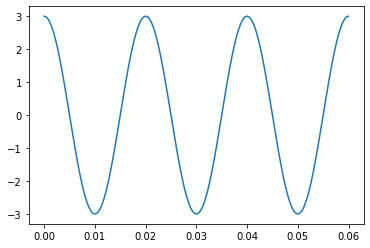

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 3*np.cos(w*t)
plt.plot(t,x)



---



##• **$x(t) = 2 sin(\omega  t + \pi ) = -2sin(\omega t)$**

Se hace $x(t+T)$
$$x(t+T) = -2sin(\omega (t+T) )$$

$$-2sin(\omega (t+T)) = -2[sin(\omega (t))cos(\omega(T))+sin(\omega(T))cos(\omega(t)]$$

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$-2sin(\omega (t+T)) = -2[sin(\omega t)cos(\frac{2\pi}{T}T)+sin(\frac{2\pi}{T}T)cos(\omega t)]$$
$$-2sin(\omega (t+T)) = -2[sin(\omega t)1+0]$$
$$-2sin(\omega (t+T)) = -2sin(\omega t)$$

Por lo tanto $x(t) = -2 sin(\omega  t)  = -2sin(\omega(t+T)) = -2sin(\omega t) $ es periódica



###**Gráfico**

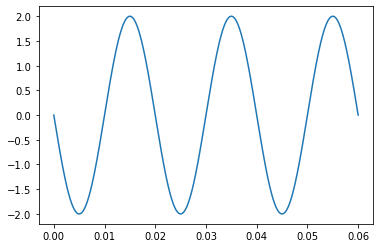

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 2*np.sin(w*t+np.pi)
plt.plot(t,x)



---



##•$ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t)-2 cos(t/\sqrt{3})$

Revisando $\omega $ para cada señal se observa como hay $\sqrt{3}$, por lo tanto la función no es cuasiperiódica porque sus $\omega $ no son números enteros.


###**Gráfico**

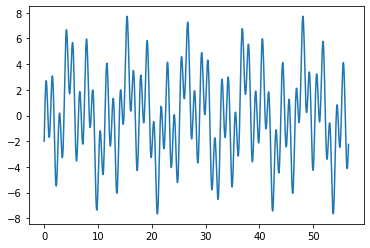

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 6*np.pi
t = np.linspace(0,3*T,1000)
x = 3*np.sin(np.sqrt(3)*t)+3*np.sin(5*t)-2*np.cos(t/np.sqrt(3))
plt.plot(t,x)



---



##•$ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$

Se hace $\omega_1 = 4, \omega_2 = 50, \omega_3 = 10$


$\frac{\omega_1}{\omega_2}, \frac{\omega_2}{\omega_3}, \frac{\omega_3}{\omega_1}
$ 


$\frac{4}{50} , \frac{50}{10}, \frac{10}{4}$ son entero sobre entero, entonces la funcion es cuasiperiódica


Se encuentran los periodos:


$T_1 = \frac{\pi}{2}; T_2 = \frac{\pi}{25}; T_3 = \frac{\pi}{5}$


$$T_1k_1=T_2k_2=T_3k_3=T$$


$$ \frac{\pi}{2}k_1 = \frac{\pi}{25}k_2 = \frac{\pi}{5}k_3 = T$$

Se multiplica por $50$ y se divide entre $\pi$, teniendo que encontrar el mcm de 25, 2, 10 el cuál es ***50***.

Ahora, con la expresión: 

$$25k_1=2k_2=10k_3=50$$ se obtiene los valores de $k_1,k_2$ y $k_3$

$k_1 = 2$

$k_2 = 25$

$k_3 = 5$

Al reemplazar: $$2\frac{\pi}{2} = 25\frac{\pi}{25} = 5\frac{\pi}{5} = T$$

$$T = \pi$$



###**Gráfico**

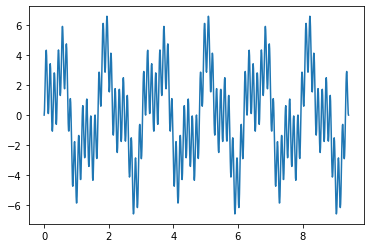

In [0]:
T = np.pi
N = 1000
t = np.linspace(0,3*T,N)
x = 3*np.sin(4*t) - 2*np.cos(50*t) + 2*np.cos(10*t)
plt.plot(t,x)



---



##• $x(t) = e^{j\omega  t}$

Se convierte la funcion en senos y cosenos complejos:

$$x(t) = e^{j\omega  t} = Cos(\omega t) + j Sen (\omega t)$$

Se hace $x(t-T)$

$$x(t-T) = e^{j\omega  (t-t)} = Cos(\omega (t-T)) + j Sen (\omega (t-T))$$

$$x(t-T) = [Cos(\omega t) Cos(\omega T)+Sen (\omega t)Sen (\omega T)] + j [Sen (\omega t)Cos(\omega T)-Cos(\omega t)Sen (\omega T)]$$

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$x(t-T) = [Cos(\omega t) Cos(\frac{2\pi}{T} T)+Sen (\omega t)Sen (\frac{2\pi}{T} T)] + j [Sen (\omega t)Cos(\frac{2\pi}{T} T)-Cos(\omega t)Sen (\frac{2\pi}{T} T)]$$

$$x(t-T) = [Cos(\omega t) 1+0] + j [Sen (\omega t)1-0]$$

$$x(t-T) = e^{j\omega  (t-t)} = Cos(\omega t) + j Sen (\omega t)$$



###**Gráfico**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


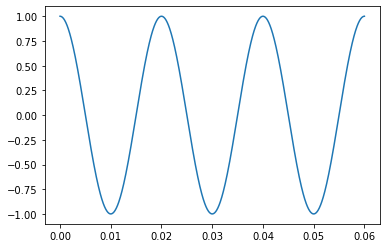

In [0]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = np.exp(w*(0+1j)*t)
plt.plot(t,x)



---



#**3. Senales de energía y potencia**

# Clasifique segun su tipo (energía o potencia):


*   $x(t) = - 3t + 1; \forall t \in  [0, 5]$
*   $x(t) = A cos(\omega  t) + B sin(\omega  t); A, B, \omega   \in  \mathbb{R}^+$
*   $x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$
*   $x[n] = nu[n]; n \in  {0, \pm  1, \pm  2, . . . , \pm  N}$
*   $x[n] = cos[n\pi ] + sin[2n\pi /3]; n \in  {0, 1, . . . , N}; N \in  \mathbb{N}$
*   $x[n] = A cos[n\pi ]u[n -  n_o]; A \in  \mathbb{R}^+$ y $n \in  {0 \pm  1, \pm  2, . . . , \pm  N}; 0 < n_o < N$


#**•$x(t) = - 3t + 1; \forall t \in  [0, 5]$**

Con la ecuacion de energía:

$$Ex = \int_{T} {\mid x(t)\mid}^{2}dt $$

Hallamos la energía de la función:

$$Ex = \int_{0}^{5} {\mid(-3t+1)\mid}^{2}dt  $$

$$Ex = \int_{0}^{5} {\mid(9t^2-6t^2+1)\mid}dt  $$

$$Ex = \int_{0}^{5} {9t^2} dt- \int_{0}^{5} {6t^2} dt+ \int_{0}^{5} {1}dt  $$

$$Ex = \frac{9t^3}{3}\Big|_0^5 -\frac{6t^2}{2}\Big|_0^5 + t \Big|_0^5  $$

$$Ex = 375 -75 +5 = 305 $$

Como $ Ex= 305 \rightarrow 0 < 305 < \infty $ La señal es de energia.


In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t= sp.symbols('t', real = True)
a= (sp.Abs(3*t-1))**2
ai = sp.integrate(a,(t,0,5))
ai

$$305$$

###Gráfica

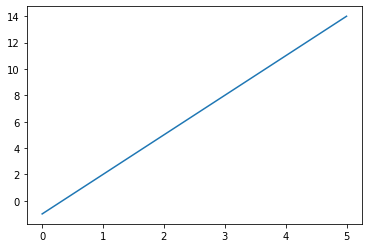

In [0]:
t90 = np.linspace(0,5,1000)
x = 3*t90-1
plt.plot(t90,x)



---



#**•$x(t) = A cos(\omega  t) + B sin(\omega  t); A, B, \omega   \in  \mathbb{R}+$**

Con la ecuacion de energía:

$$E_x = \int_{T} {\mid x(t)\mid}^{2}dt $$

Hallamos la energía de la función:

$$E_x = \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} {\mid(A cos(\omega  t) + B sin(\omega  t))\mid}^{2}dt \rightarrow T_0 = \frac{2 \pi}{\omega}   $$

$$E_x = \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} {\mid(A^2 cos^2(\omega  t) + 2AB sin(\omega  t)cos(\omega  t)+sin^2(\omega  t))\mid}dt  $$

$$E_x = A^2 \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  cos^2(\omega  t) dt + 2AB  \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}} sin(\omega  t)cos(\omega  t) dt + B^2 \int_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  sin^2(\omega  t)dt  $$

$$E_x =  [\frac{A^2}{2}t+\frac{A^2}{4 \omega}\sin (2\omega t)) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}} -[\frac{AB}{2 \omega}\cos (2 \omega t) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}}  +  [\frac{B^2}{2}t+\frac{B^2}{4 \omega}\sin (2\omega t)) ]\Big|_{-\frac{T_0}{2}}^{\frac{T_0}{2}}$$

$$E_x = \frac{A^2}{2}T_0 + \frac{B^2}{2}T_0 = \frac{T_0}{2}(A^2 + B^2)$$

$$ E_x = \lim_{T_0 \to \infty} \frac{T_0}{2}(A^2 + B^2) = \infty$$

• El límite va hacia el infinito, entonces $x(t)$ no es de energía.


Ahora con la ecuacion de potencia:

$$P_x = \frac{E_x}{T_0} $$

Calculamos la potencia:

$$P_x = \frac{ \frac{T_0}{2}(A^2 + B^2)}{T_0} $$

$$P_x = \frac{ (A^2 + B^2)}{2} $$

$$P_x = \lim_{T_0 \to \infty}  \frac{ (A^2 + B^2)}{2} = \frac{ 1}{2}(A^2 + B^2)< \infty $$

La señal $x(t)$ es de potencia

###Gráfica

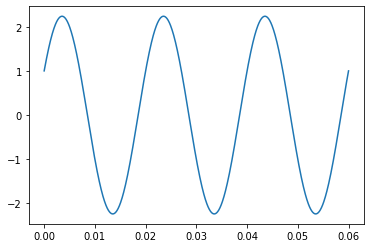

In [0]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
A=2
B=1
x = A*np.sin(w*t)+B*np.cos(w*t)

plt.plot(t,x)




---



#**•$x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$**#

Con la ecuacion de energía:

$$E_x = \int_{T} {\mid x(t)\mid}^{2}dt $$

Hallamos la energía de la función:

$$E_x = \int_{-\infty}^{\infty} {\mid(ate^{- kt} (u(t) -  u(t -  t_o)))\mid}^{2}dt $$

$$E_x = \int_{0}^{t_o} {\mid ate^{- kt} \mid}^{2}dt $$

$$E_x = \int_{0}^{t_o} a^2 t^2 e^{- 2kt} dt $$

$$E_x = a^2[-\frac{t^2}{2k}e^{-2kt} - \frac{t}{2k^2}e^{-2kt}- \frac{1}{2k^2}e^{-2kt} ] \Big|_{0}^{t_o} $$

$$E_x = [-\frac{a^2e^{-2kt}\left(2k^2t^2+2kt+1\right)}{4k^3}] \Big|_{0}^{t_o} $$

$$ E_x = -\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$

$$ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} =   
\begin{cases} \frac{a^2}{4k^3}  & \text{para}\: K > 0 \\\ \infty & \text{para}\: K < 0 \end{cases}
$$


•Por lo tanto para $k>0$ la señal $x(t)$ es de energía

• Y para $k<0$ la señal $x(t)$ no es de energía


Ahora con la ecuacion de potencia:

$$P_x = \frac{E_x}{T_0} $$

Calculamos la potencia:
$$P_x =  -\frac{1}{t_o} \frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$

$$P_x = \lim_{t_o \to \infty} -\frac{1}{t_o} \frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} =
\begin{cases} 0  & \text{para}\: K > 0 \\\ \infty & \text{para}\: K < 0 \end{cases}
 $$

• Por lo tanto para $k>0$ la señal $x(t)$ es de energía.

• Y para $k<0$ la señal $x(t)$ no es de energia ni de potencia.



###Gráfica

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


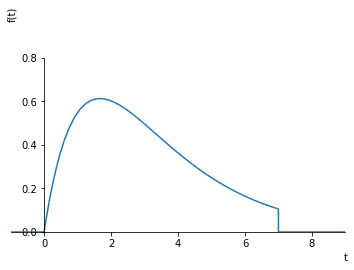

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
t,a = sp.symbols('t a', real = True)
to = sp.symbols('to', positive = True)
k = sp.symbols('k',positive = True)
f = a*t*sp.exp(-t*k)*(sp.Heaviside(t)-sp.Heaviside(t-to))
sp.plot(f.subs({a: 1, k : .6, to : 7}),(t,-1,9))
f



---



#**•  $x[n] = nu[n]; n \in  {0, \pm  1, \pm  2, . . . , \pm  N}$**


Con la ecuacion de energía:

$$E_x = \lim_{N \to \infty} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Hallamos la energía de la función:

 $$E_x = \lim_{N \to \infty} \sum_{n=-N}^{N}\mid nu[n]\mid^2 = \lim_{N \to \infty} \sum_{n=0}^{N}n^2 = \lim_{N \to \infty} (\frac{1}{6}N\left(N+1\right)\left(2N+1\right) )= \infty$$

• El límite va hacia el infinito, entonces $x[n]$ no es de energía.

Ahora con la ecuacion de potencia:

$$P_x = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Calculamos la potencia:
$$P_x = \lim_{N \to \infty}(\frac{1}{2N+1}\sum_{n=-N}^{N} \mid nu[n]\mid^2) = \lim_{N \to \infty}(\frac{1}{2N+1} \frac{1}{6}N\left(N+1\right)\left(2N+1\right)) = \lim_{N \to \infty} (\frac{1}{6}N\left(N+1\right)) = \infty $$ 

• El límite va hacia el infinito, entonces $x[n]$ no es de energía ni de potencia.

##Gráfica

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

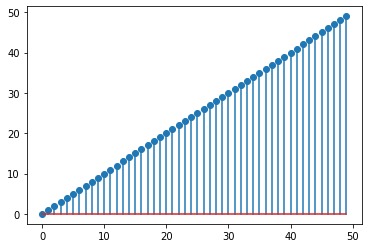

In [0]:
import numpy as np
import matplotlib.pyplot as plt
N = 50
n = np.arange(0,N,1)
x = n*np.heaviside(n,0)
plt.stem(n,x)



---



#**•$x[n] = cos[n\pi ] + sin[2n\pi /3]; n \in  {0, 1, . . . , N}; N \in  \mathbb{N}$**

Con la ecuacion de energía:

$$E_x = \lim_{N \to \infty} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Hallamos la energía de la función:

 $$E_x = \lim_{N \to \infty} \sum_{n=0}^{N}\mid cos[n\pi ] + sin[\frac {2n\pi} {3}]\mid^2 $$
 $$E_x = \lim_{N \to \infty} \sum_{n=0}^{N}\mid cos^2[n\pi ] + 2cos[n\pi ]sin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}] \mid $$
  
  $$E_x = \lim_{N \to \infty} \sum_{n=0}^{N} ((-1)^n)^2+ 2(-1)^nsin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}]  = \lim_{N \to \infty} \sum_{n=0}^{N} 1 +2(-1)^nsin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}] $$

$$ E_x = \lim_{N \to \infty} N+1   \sum_{n=0}^{N} 2(-1)^nsin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}] = \infty $$

• El límite va hacia el infinito, entonces $x[n]$ no es de energía.

Ahora con la ecuacion de potencia:

$$P_x = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Calculamos la potencia:
$$P_x = \lim_{N \to \infty}(\frac{1}{N+1}\sum_{n=0}^{N} \mid cos[n\pi ] + sin[\frac {2n\pi} {3}\mid^2) $$
$$ P_x = \lim_{N \to \infty} \frac {N+1   \sum_{n=0}^{N} 2(-1)^nsin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}]}{N+1}$$
$$ P_x = \lim_{N \to \infty} 1 +\frac { \sum_{n=0}^{N} 2(-1)^nsin[\frac {2n\pi} {3}] + sin^2[\frac {2n\pi} {3}]}{N+1} = 1$$

• El límite tiende a una constante donde $0<P_x<\infty $, entonces $x[n]$ es potencia.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<StemContainer object of 3 artists>

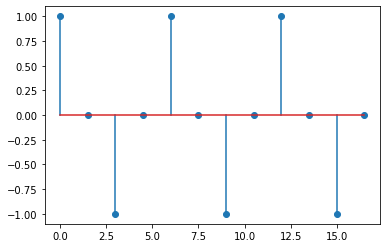

In [15]:
import numpy as np
import matplotlib.pyplot as plt
T = 6
F = 1/T
Fs= 4*F
Ts=1/Fs
n = np.arange(0,3*T,Ts)
f = np.cos(n*np.pi)+np.sin(2*n*np.pi/3)
plt.stem(n,f)



---



#**•$x[n] = A cos[n\pi ]u[n -  n_o]; A \in  \mathbb{R}^+$ y $n \in  {0 \pm  1, \pm  2, . . . , \pm  N}; 0 < n_o < N$**


Con la ecuacion de energía:

$$E_x = \lim_{N \to \infty} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Hallamos la energía de la función:

 $$E_x = \lim_{N \to \infty} \sum_{n=-N}^{N}\mid A cos[n\pi ]u[n -  n_o]\mid^2 =  \lim_{N \to \infty} \sum_{n=n_o}^{N}\mid A cos[n\pi ]\mid^2 $$
 $$E_x = A^2 \lim_{N \to \infty} \sum_{n=n_o}^{N}cos^2[n\pi ] = A^2 \lim_{N \to \infty} \sum_{n=n_o}^{N} ((-1)^n)^2= A^2 \lim_{N \to \infty} \sum_{n=n_o}^{N} 1 $$
 $$ E_x  = A^2 \lim_{N \to \infty} N-n_o + 1 = \infty $$

 • El límite va hacia el infinito, entonces $x[n]$ no es de energía.

Ahora con la ecuacion de potencia:

$$P_x = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-N}^{N} {\mid x[n]\mid}^{2} $$

Calculamos la potencia:
$$P_x = \lim_{N \to \infty}(\frac{1}{2N+1}\sum_{n=n_o}^{N} \mid A cos[n\pi ]\mid^2) = A^2 \lim_{N \to \infty}(\frac{N-n_o + 1}{2N+1}    ) = \begin{cases} 0  & \text{para}\: A = 0 \\ \frac{A^2}{2} & \text{para}\: A \not= 0 \end{cases} $$


  
• Por lo tanto para $A=0$ la señal $x[n]$ no es de Energía ni de Potencia.

• Y para $A \not= 0$ la señal $x[n]$ es de Potencia.


##Simulación Potencia

In [0]:
import sympy as sp
from sympy import init_printing
init_printing()
no, N = sp.symbols('no N', positive = True)
A = sp.symbols('A', real = True)

a= (A**2)*(1/(2*N+1))*(N-no+1)
ai = sp.limit(a,N,sp.oo)
ai

$$\frac{A^{2}}{2}$$

##Gráfica

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

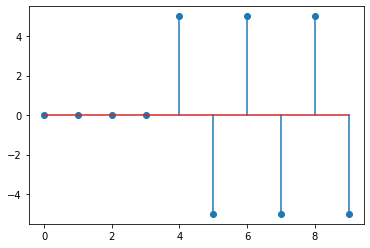

In [0]:
import numpy as np
import matplotlib.pyplot as plt
T = 2
A = 5
F = 1/T
Fs = 2*F
no = 2*T
n = np.arange(0,5*T,Fs)
u = n >= no
f = A*np.cos(n*np.pi)*u
plt.stem(n,f)




---



#**4. Discretización de señales cosenoidales**
###– Se pretende muestrear la senal $x(t) = cos(\Omega t)$, con $t \in [0, T], \Omega = 2\pi F, F = 1/T$ y $F = 60 Hz $. Se emplea un sistema de discretizacion con frecuencia de muestreo $Fs = 90 Hz$. Demuestre si el sistema utilizado es apropiado para la señal  $x(t)$ y estime la señal capturada. Realice una simulación en Python del proceso de discretización.






$ \Rightarrow $ $x(t) = cos(2\pi F t)$; $ F=60Hz $; $Fs = 90 Hz$

El sistema de discretización no es apropiado porque $F_s$ no cumple la siguiente condición:

$$ F_S \geq 2F $$
$$ 90hz \geq 2\text {x} 60hz $$
$$ 90hz \geq 120hz \Rightarrow \text {No se cumple la igualdad}  $$

Ahora para estimar la señal capturada se aplica $t = nT_s = n/F_s$ 

$$x[t = n T_s] =  cos[2\pi F nT_s]$$

$$x[t = n T_s] = cos[2\pi  \tfrac{F}{F_s} n] $$

Aplicando $\Omega_i = 2\pi f_i = 2\pi \tfrac{F_i}{F_s}$ ; Donde si $\Omega \in [-\pi,\pi]$ es original, de lo contrario es copia:

$\Omega = 2 \pi \tfrac{60}{90} = \frac{4}{3}\pi \in [-\pi,\pi]$ (Copia)

Como $\Omega$ es copia y está $2 \pi$ por encima de la original, es decir una vuelta por delante, entonces tenemos que hacer: 
$$\Omega^{original}= \Omega^{copia} - 2\pi$$
$$\Omega^{original}=  \frac{4}{3}\pi  - 2\pi = -\frac{2}{3}\pi \in [-\pi,\pi] \text {(Original)} $$ 

Después de encontrar el coseno original:

$x[n] = cos[-\frac{2}{3}\pi n]$ 

•Donde $x[n]$ es la señal discretizada con $Fs=90hz$.



##Grafica de la señal $x(t)$

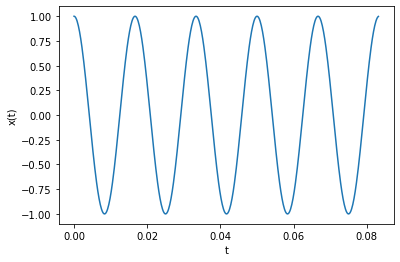

In [0]:

import numpy as np
import matplotlib.pyplot as plt

F = 60
w=2*np.pi*F

Fs = 100*F
T = 1/F
Ts = 1/Fs

t = np.arange(0,5*T,Ts) 

x = np.cos(w*t) 

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()



##Grafica de la señal $x(t)$  con $Fs=90hz$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


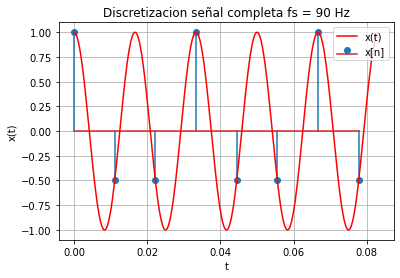

In [13]:

import numpy as np
import matplotlib.pyplot as plt

F = 60
w=2*np.pi*F
Fs = 90
T = 1/F
Ts = 1/Fs
t = np.arange(0,5*T,Ts) 
x = np.cos(w*t)

F1 = 60
w1=2*np.pi*F1
F1s = 100*F1
T1 = 1/F1
T1s = 1/F1s

t1 = np.arange(0,5*T1,T1s) 

x1 = np.cos(w1*t1)

 

plt.stem(t,x, label="x[n]")
plt.plot(t1,x1,color='r',label="x(t)")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.title("Discretizacion señal completa fs = 90 Hz")
plt.show()





---



###-Se tiene un microprocesador de 3 bits con entrada analoga entre 0 y 10 $[v]$. Describa las condiciones necesarias para que el microprocesador pueda digitalizar la señal $x(t) = 9 cos(200\pi t)$. Presente una simulacion en Python de dicho proceso para un ciclo de la señal $x(t)$.

$ \Rightarrow $ $x(t) = 9 cos(200\pi t)$ 

Hallando la frecuencia fundamental podemos hallar una frecuencia de muestreo apropiada para discretizar la señal adecuadamente con el teorema Nyquist:

$$F=\frac{\omega}{2\pi}=\frac{200\pi}{2\pi} = 100hz$$

Teniendo la frecuencia fundamental hallamos la frecuencia de muestreo:

$$ F_S \geq 2F $$
$$ F_S \geq 2\text {x} 100hz $$
$$ F_S \geq 200hz $$

Entonces la $F_s$ del microprocesador debe de ser almenos $200hz$

Seguido de ésto, se tiene que el Microprocesador trabaja con señales analogas de $0$ a $10$ $[v]$, por ende la señal no cumple las condiciones del microprocesador.Se deberá de adecuar con el metodo de cero y pendiente la señal como se muestra a continuación:






Se plantea $y(t) = mx(t)+b$ tal que:
$$\begin{cases} y(t) = 0  & \rightarrow \: x(t)=-9\\ y(t) = 10 & \rightarrow\: x(t) =9  \end{cases} $$

Para ello se debe de hallar $m$ de la siguiente manera:

$$m = \frac{y_2-y_1}{x_2-x_1} = \frac{10-0}{9-(-9)} =\frac{10}{18} = \frac{5}{9}$$

Y determinar $b$ como se muestra a continuación:

$$b = y(0)-mx(0)  $$
$$ y(0) = 0 ; x(0) = -9 $$ 
$$ b = 0 - \frac{5}{9}(-9) = 5$$

Por lo tanto la nueva señal hallada que el microprocesador puede digitalizar es:

$$y(t) = 5cos(200\pi)+5$$



Ahora para discretizar la señal se aplica $t = nT_s = n/F_s$ :

$$y[t = n T_s] =  5cos[2\pi F nT_s]+5$$

$$y[t = n T_s] = 5cos[2\pi  \tfrac{F}{F_s} n]+5 $$

$$y[t = n T_s] = 5cos[ 2 \pi \tfrac{100}{200} n]+5 $$

$$y[t = n T_s] = 5cos[ \pi n]+5 $$

•Donde $y[n]$ es la señal discretizada con $Fs=200hz$.

Ahora para Digitalizar la señal: 

Con los 3 bits del microprocesador se obtienen 8 posibles estados ($2^3=8$), con tamaño de paso en voltaje igual a $\Delta v = 10/8 = 1.25 [v]$ entonces los intervalos de la señal se aplica la siguiente etapa de cuantización:

$$\begin{array}{c|c} \hline
x[n] &amp; x_c[n] &amp; Binario\\ \hline
[0.00,1.25) &amp; 0.00 &amp;0 0 0\\ \hline
[1.25,2.50) &amp; 1.25 &amp; 0 0 1\\ \hline
[2.50,3.75) &amp; 2.50 &amp; 0 1 0\\ \hline
[3.75,5.00] &amp; 3.75 &amp;0 1 1\\ \hline
[5.00,6.25] &amp; 5.00 &amp;1 0 0\\ \hline
[6.25,7.50] &amp; 6.25 &amp;1 0 1\\ \hline
[7.50,8.75] &amp; 7.50 &amp;1 1 0 \\ \hline
[8.75,10.00] &amp; 8.75 &amp;1 1 1\\ \hline
\end{array}$$


###Gráfica de las señale $x(t)$ $y(t)$

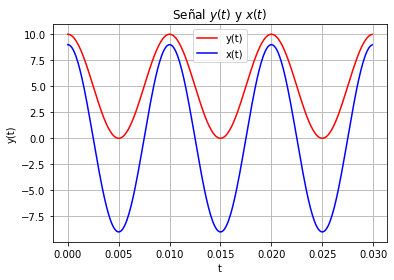

In [20]:
import numpy as np
import matplotlib.pyplot as plt

F = 100
w=2*np.pi*F
Fs = 100*F
T = 1/F
Ts = 1/Fs
t = np.arange(0,2*T,Ts) 
x = 9*np.cos(w*t)

Fy = 100
wy=2*np.pi*Fy
Fsy = 100*Fy
Ty = 1/Fy
Tsy = 1/Fsy
ty = np.arange(0,2*Ty,Tsy) 
y = 5*np.cos(wy*ty)+5

 
plt.plot(ty,y,color='r',label="y(t)")
plt.plot(t,x,color='b',label="x(t)")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('y(t)')
plt.title("Señal $y(t)$ y $x(t)$")
plt.show()



###Gráfica de discretización y cuantización de $y[n]$ 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


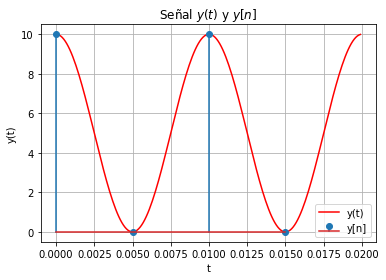

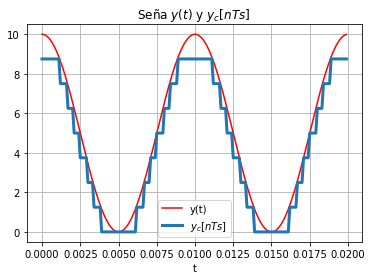

In [28]:
import numpy as np
import matplotlib.pyplot as plt

F = 100
w=2*np.pi*F
Fs = 2*F
T = 1/F
Ts = 1/Fs
t = np.arange(0,2*T,Ts) 
x = 5*np.cos(w*t)+5

Fy = 100
wy=2*np.pi*Fy
Fsy = 100*Fy
Ty = 1/Fy
Tsy = 1/Fsy
ty = np.arange(0,2*Ty,Tsy) 
y = 5*np.cos(wy*ty)+5

 
plt.plot(ty,y,color='r',label="y(t)")
plt.stem(t,x,label="y[n]")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('y(t)')
plt.title("Señal $y(t)$ y $y[n]$")
plt.show()

# cero y pendiente mas discretizacion mas cuantizacion
import numpy as np
import matplotlib.pyplot as plt

yc = np.zeros(len(y))

for i in range(len(y)):
    if y[i] < 1.25:
       yc[i] = 0
    elif (y[i] >= 1.25) and (y[i] <= 2.5):
        yc[i] = 1.25
    elif (y[i] >= 2.5) and (y[i] <= 3.75):
        yc[i] = 2.5
    elif (y[i] >= 3.75) and (y[i] <= 5):
        yc[i] = 3.75
    elif (y[i] >= 5) and (y[i] <= 6.25):
        yc[i] = 5
    elif (y[i] >= 6.25) and (y[i] <= 7.5):
        yc[i] = 6.25
    elif (y[i] >= 7.5) and (y[i] <= 8.75):
        yc[i] = 7.5
    else:
        yc[i] = 8.75
    
plt.plot(ty,y,color='r',label="y(t)")
plt.plot(ty,yc,label="$y_c[nTs]$",linewidth = 3)
plt.legend()
plt.xlabel('t')
plt.grid()
plt.title("Seña $y(t)$ y $y_c[nTs]$ ")
plt.show()



---



###– Se tiene un sistema de discretización con frecuencia de muestreo $Fs = 40 Hz$, aplicado a las señales $x_1 (t) = cos(20\pi t)$ y $x_2 (t) = cos(100 \pi t)$: Las versiones discretizadas de las señales son distinguibles entre si?. Implemente simulación en Python del proceso de discretización.

$ \Rightarrow $ $x_1 (t) = cos(20\pi t)$; $ F_1=10Hz $; $Fs = 40 Hz$

$ \Rightarrow $ $x_2 (t) = cos(100 \pi t)$ ; $ F_2=50Hz $; $Fs = 40 Hz$



Ahora para Discretizar las señales capturadas se aplica $t = nT_s = n/F_s$ 

Para $x_1(t)$:

$$x_1[t = n T_s] =  cos[2\pi F_1 nT_s]$$

$$x_1[t = n T_s] = cos[2\pi  \tfrac{F_1}{F_s} n] $$

Aplicando $\Omega_i = 2\pi f_i = 2\pi \tfrac{F_i}{F_s}$ ; Donde si $\Omega \in [-\pi,\pi]$ es original, de lo contrario es copia:

$$\Omega_1 = 2 \pi \tfrac{10}{40} = \frac{1}{2}\pi \in [-\pi,\pi] \text{(Original)}$$ 

Entonces la señal $x_1(t)$ discretizada es:

$$x_1[n] = cos[ \frac{\pi}{2} n] $$

Para $x_2(t)$:

$$x_2[t = n T_s] =  cos[2\pi F_2 nT_s]$$

$$x_2[t = n T_s] = cos[2\pi  \tfrac{F_2}{F_s} n] $$

$$\Omega_2 = 2 \pi \tfrac{50}{40} = \frac{5}{2}\pi \notin [-\pi,\pi] \text{(Copia)}$$ 

Como $\Omega_2 $ es copia y está $2 \pi$ por encima de la original, es decir una vuelta por delante, entonces tenemos que hacer: 
$$\Omega_{2}^{original}= \Omega_{2}^{copia} - 2\pi$$
$$\Omega_{2}^{original}=  \frac{5}{2}\pi  - 2\pi = \frac{1}{2}\pi \in [-\pi,\pi] \text {(Original)} $$ 

Entonces la señal $x_2(t)$ discretizada es:

$$x_2[n] = cos[ \frac{\pi}{2} n] $$ 

•Entonces las señales $x_1[n] = cos[ \frac{\pi}{2} n]$ y $x_2[n] = cos[ \frac{\pi}{2} n]$ no son distinguibles entre si porque tienen la misma frecuencia angular $\omega_1 = \omega_2 $



###Simulación

###Gráfica de $x_1(t)$ y $x_2(t)$

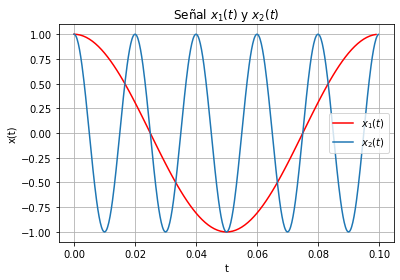

In [71]:
import numpy as np
import matplotlib.pyplot as plt

F1 = 10
w1=2*np.pi*F1
Fs1 = 100*F1
T1 = 1/F1
Ts1 = 1/Fs1
t1 = np.arange(0,T1,Ts1) 
x1 = np.cos(w1*t1)

F2 = 50
w2=2*np.pi*F2
Fs2 = 100*F2
T2 = 1/F2
Ts2 = 1/Fs2
t2 = np.arange(0,5*T2,Ts2) 
x2 = np.cos(w2*t2)

 
plt.plot(t1,x1,color='r',label="$x_1(t)$")
plt.plot(t2,x2,label="$x_2(t)$")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.title("Señal $x_1(t)$ y $x_2(t)$")
plt.show()

###Gráfica de $x_1[n]$ y $x_2[n]$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


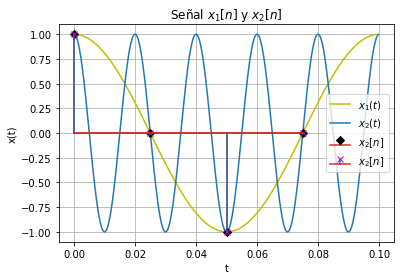

In [75]:

F1 = 10
w1=2*np.pi*F1
Fs1 = 100*F1
T1 = 1/F1
Ts1 = 1/Fs1
t1 = np.arange(0,T1,Ts1) 
x1 = np.cos(w1*t1)

F2 = 50
w2=2*np.pi*F2
Fs2 = 100*F2
T2 = 1/F2
Ts2 = 1/Fs2
t2 = np.arange(0,5*T2,Ts2) 
x2 = np.cos(w2*t2)

F1d = 10
w1d=2*np.pi*F1d
Fs = 40
T1d = 1/F1d
Ts1d = 1/Fs
t1d = np.arange(0,T1d,Ts1d) 
x1d = np.cos(w1d*t1d)

F2d = 50
w2d=2*np.pi*F2d
T2d = 1/F2d
Ts2d = 1/Fs
t2d= np.arange(0,5*T2d,Ts2d) 
x2d = np.cos(w2d*t2d)

 
plt.plot(t1,x1,color='y',label="$x_1(t)$")
plt.plot(t2,x2,label="$x_2(t)$")
plt.stem(t1d,x1d,linefmt='red', markerfmt='Dk',label="$x_2[n]$")
plt.stem(t2d,x2d,markerfmt='xm',label="$x_2[n]$") 
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.title("Señal $x_1[n]$ y $x_2[n]$")
plt.show()



---



###– ¿Cuál es la frecuencia de muestreo límite apropiada para discretizar la senal $x(t) = 3 cos(2000\pi t) + 5 sen(6000\pi t) + 10 cos(12000\pi t)$ ? Si se utiliza una frecuencia de muestreo de 5kHz, cual es la señal discreta obtenida?

$ \Rightarrow $ $x(t) = 3 cos(2000\pi t) + 5 sin(6000\pi t) + 10 cos(12000\pi t)$;$ Fs = 5000 Hz  $ 


Para comenzar buscaremos el periodo total de la señal. Primero evaluamos si la señal es cuasiperiódica:

$$\frac{\omega_1}{\omega_2} = \frac{2000\pi}{6000\pi} = 1/3 $$
$$\frac{\omega_1}{\omega_3} = \frac{2000\pi}{12000\pi}= 1/6$$
$$\frac{\omega_2}{\omega_3} = \frac{6000\pi}{12000\pi}= 1/2$$

Como las fracciones $\frac{\mathbb {z}}{\mathbb {z}}$ son $x(t)$ es cuasiperiódica.

A continuación hallaremos $T$:

$$k_1 T_1 = k_2 T_2 = k_3 T_3 = T $$ 
$${\rm{mcm}}(T_1,T_2,T_3) $$
$$k_1 \frac{1}{1000} = k_2 \frac{1}{3000} = k_3 \frac{1}{6000}= T $$
$$k_1 \frac{6000}{1000} = k_2 \frac{6000}{3000} = k_3 \frac{6000}{6000} $$
$$k_1 6 = k_2 2 = k_3 1 $$
$$mcm(6,2,1) = 6$$
$$k_1 =1; k_2 = 3; k_3=6$$
$$1 \frac{1}{1000} = 3 \frac{1}{3000} = 6 \frac{1}{6000}= T = \frac{1}{1000}$$

Se va a necesitar la frecuencia de cada seno y coseno de $x(t)$ hallandolos con $ F = \frac{\omega}{2\pi} $

$$ F_1=1000Hz $$
$$ F_2=3000Hz $$
$$ F_3=6000Hz $$

La frecuencia límite de muestreo adecueda para deiscretizar la señal $x(t)$ sería:

$$ F_s \geq 2  F_{max} $$
$$ F_s \geq 2  F_3 $$
$$ F_s \geq 2 (6000) Hz $$
$$ F_s \geq 12000 Hz $$

Ahora para Discretizar las señal capturadas se aplica $t = nT_s = n/F_s$ 

$$x[t = n T_s] =  3cos[2\pi F_1 nT_s] + 5 sen[2\pi F_2 nT_s] + 10cos[2\pi F_3 nT_s]$$

$$x[t = n T_s] = 3cos[2\pi \tfrac{F_1}{F_s} n] + 5sen[2\pi \tfrac{F_2}{F_s} n] + 10cos[2\pi \tfrac{F_3}{F_s} n] $$

Aplicando $\Omega_i = 2\pi f_i = 2\pi \tfrac{F_i}{F_s}$ ; Donde si $\Omega \in [-\pi,\pi]$ es original, de lo contrario es copia:

$$\Omega_1 = 2 \pi \tfrac{1000}{5000} = \frac{2}{5}\pi \in [-\pi,\pi] \text{(Original)}$$ 
$$\Omega_2 = 2 \pi \tfrac{3000}{5000} = \frac{6}{5}\pi \notin [-\pi,\pi] \text{(Copia)}$$
$$\Omega_3 = 2 \pi \tfrac{6000}{5000} = \frac{12}{5}\pi \notin [-\pi,\pi] \text{(Copia)}$$



Como $\Omega_2 $ y $\Omega_3 $ son copias y están $2 \pi$ por encima de la original, es decir una vuelta por delante, entonces tenemos que hacer: 
$$\Omega^{original}= \Omega^{copia} - 2\pi$$

$$\Omega_{2}^{original}=  \frac{6}{5}\pi  - 2\pi = -\frac{4}{5}\pi \in [-\pi,\pi] \text {(Original)} $$ 

$$\Omega_{3}^{original}=  \frac{12}{5}\pi  - 2\pi = \frac{2}{5}\pi \in [-\pi,\pi] \text {(Original)} $$

Entonces la señal $x_2(t)$ discretizada es:

$$x[ n ] = 3cos[ \frac{2}{5} \pi n] + 5sen[-\frac{4}{5} \pi n] + 10cos[\frac{2}{5}\pi n] $$

$$x[ n ] = 13cos[ \frac{2}{5} \pi n] + 5sen[-\frac{4}{5} \pi n] $$

•Entonces la señal $x[n]$ es la señal discretizada de $x(t)$ con $F_s = 5000 Hz$.




###Gráfica $x(t)$

F1 = 1000.0[Hz];F2 = 3000.0[Hz];F3 = 6000.0[Hz]


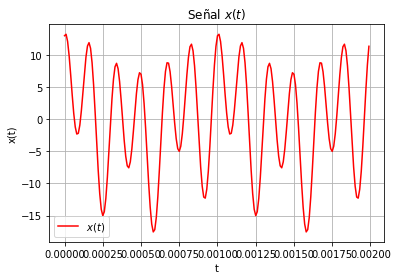

In [84]:
import numpy as np
import matplotlib.pyplot as plt

w1 = 2000*np.pi
w2 = 6000*np.pi
w3 = 12000*np.pi

F1 = w1/(2*np.pi)
F2 = w2/(2*np.pi)
F3 = w3/(2*np.pi)

T1 = 1/F1
T2 = 1/F2
T3 = 1/F3

F=1000
T=1/F 

Fs=100*F
Ts=1/Fs

print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (F1,F2,F3))


t = np.arange(0,2*T,Ts)

x = 3*np.cos(w1*t)+ 5*np.sin(w2*t) +10*np.cos(w3*t)


 
plt.plot(t,x,color='r',label="$x(t)$")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.title("Señal $x(t)$")
plt.show()

###Gráfica de $x[n]$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


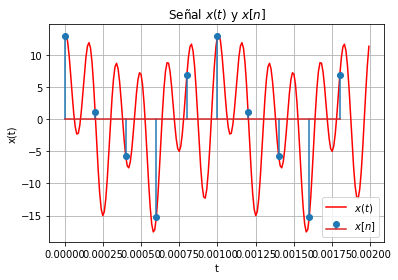

In [85]:
import numpy as np
import matplotlib.pyplot as plt

w1 = 2000*np.pi
w2 = 6000*np.pi
w3 = 12000*np.pi

F1 = w1/(2*np.pi)
F2 = w2/(2*np.pi)
F3 = w3/(2*np.pi)

T1 = 1/F1
T2 = 1/F2
T3 = 1/F3

F=1000
T=1/F 

Fs=100*F
Ts=1/Fs

Fsd= 5000
Tsd=1/Fsd

t = np.arange(0,2*T,Ts)
td = np.arange(0,2*T,Tsd)  
x = 3*np.cos(w1*t)+ 5*np.sin(w2*t) +10*np.cos(w3*t)
xd = 3*np.cos(w1*td)+ 5*np.sin(w2*td) +10*np.cos(w3*td)

 
plt.plot(t,x,color='r',label="$x(t)$")
plt.stem(td,xd,label="$x[n]$")
plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylabel('x(t)')
plt.title("Señal $x(t)$ y $x[n]$")
plt.show()



---



###-Demuestre que funciones cosenoidales con frecuencia de oscilacion $F_k = F_o + kF_s$; con $k \in \mathbb {Z} $, no son distinguibles de la funcion $cos(2πF_ot)$ al utilizar un sistema de discretizacion con frecuencia de muestreo $F_s$. Realice simulaciones para $k \in  $ $ \{ 0, \pm 1, \pm , 2, \pm 3 \} $.

Se plantea: $x(t)=cos(2\pi(F_o + kF_s)t)+cos(2\pi F_ot)$ y se discretiza:

$$x[t = \frac{n}{F_s}] = cos[\frac{2\pi F_on}{F_s}]+ cos[2\pi\frac{(F_o+kF_s)n}{F_s}]$$



$$ x[t = \frac{n}{F_s}] = cos[\frac{2\pi F_on}{F_s}]+  cos[\frac{[2\pi nF_o]}{F_s}+\frac{2\pi nkF_s}{F_s}] $$ 

$$ x[t = \frac{n}{F_s}] =cos[\frac{2\pi F_on}{F_s}]+  cos[\frac{(2\pi nF_o)}{F_s}]cos[2\pi nk]-sen[\frac{(2\pi nF_o)}{F_s}]sen[2\pi nk] $$ 

$$ x[t = \frac{n}{F_s}] =cos[\frac{2\pi F_on}{F_s}]+  cos[\frac{(2\pi nF_o)}{F_s}](1)-0 $$

$$ x[t = \frac{n}{F_s}] = cos[\frac{2\pi F_on}{F_s}]+ cos[\frac{(2\pi nF_o)}{F_s}]$$

$$x[t = \frac{n}{F_s}] =  2 cos[\frac{2\pi nF_o}{F_s}]$$

Las funciones cosenoidales con frecuencia de oscilación $F_k = F_o + kF_s; \text{ con } k \in \mathbb{Z}$, no son distinguibles de la funcion $cos(2\pi F_ot)$ debido a que aplicando álgebra finalmente obtenemos dos funciones cosenoidales con $\omega_k = \omega_o $, las cuales por tener sus frecuencias iguales se suman y por consiguiente no se puede distinguir la una de la otra.





/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


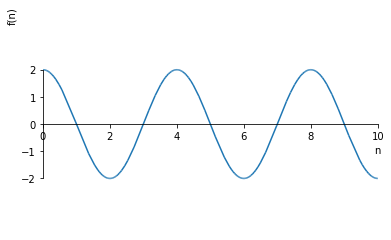

2*cos(pi*n/2)
1


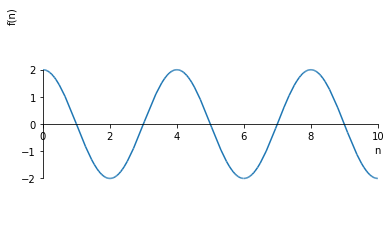

2*cos(pi*n/2)
2


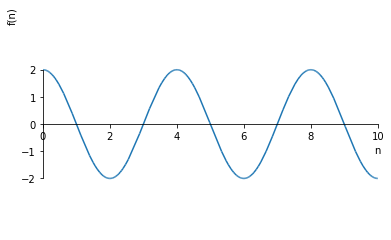

2*cos(pi*n/2)
3


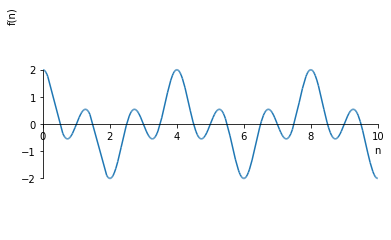

cos(pi*n/2) + cos(3*pi*n/2)
-3


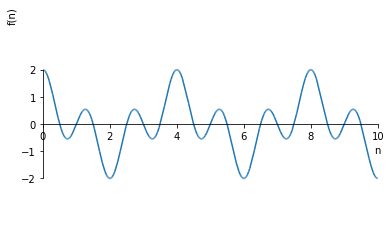

cos(pi*n/2) + cos(3*pi*n/2)
-2


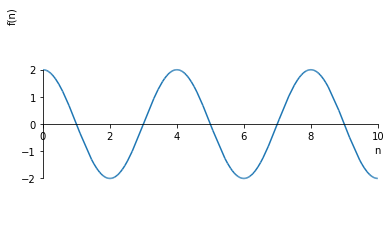

2*cos(pi*n/2)
-1


In [133]:
import sympy as sp
from sympy import init_printing
init_printing()
n,k = sp.symbols('n k', integer = True)
Fo,Fs = sp.symbols('Fo Fs', real = True)

Fk=Fo+Fs*k


f= sp.cos(2*sp.pi*Fo*n/Fs)+sp.cos(2*sp.pi*Fk*n/Fs)
ka = [-3,-2,-1,0,1,2,3]
for i in range (-3,3,1):
  sp.plot(f.subs({Fo: 50, Fs : 40,k : ka[i]}),xlim=[0,10], ylim=[-4,4])
  print(f.subs({Fo: 50, Fs : 40,k : ka[i]}))
  print(ka[i])
  i = i+1
f


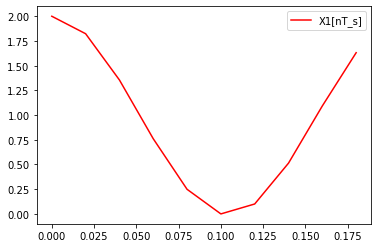

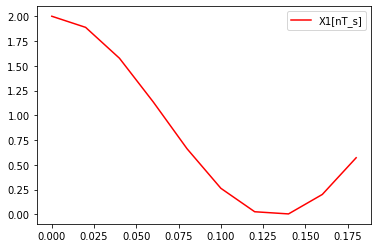

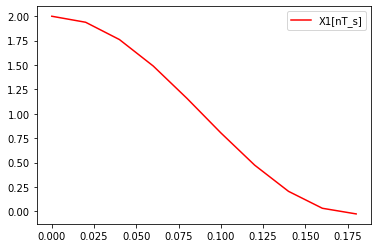

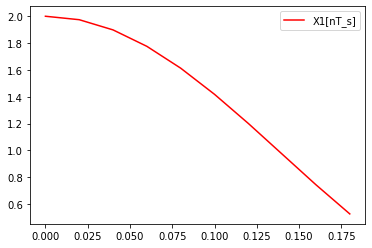

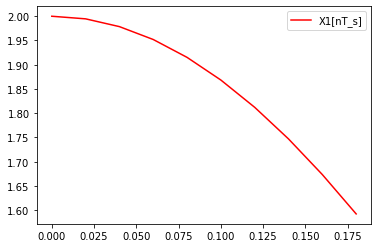

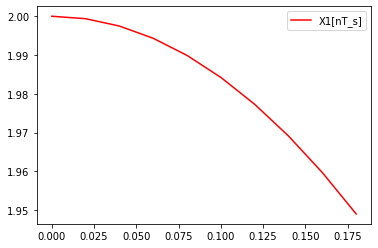

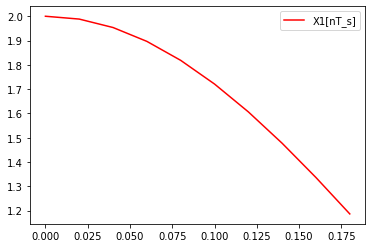

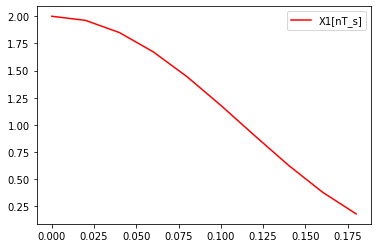

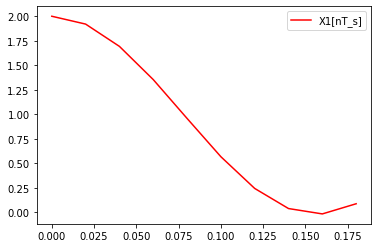

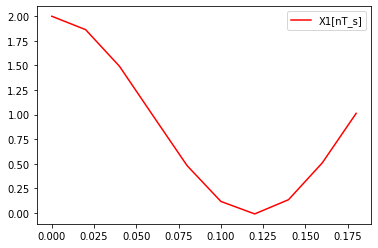

In [124]:
Fs = 50
Ts = 1/Fs
Ti = 0
tf = 2
F0 = 10
T0 = 1/F0
vec_n = np.arange(0,2*T0,Ts)
for k in range(-5,5):
    Fk = F0 + k*Fs
    xa = np.cos(vec_n*2*np.pi*F0/Fs) + np.cos(vec_n*2*np.pi*Fk/Fs)
#    xb = np.cos(vec_n*2*np.pi*Fk)


    plt.plot(vec_n,xa,"r", label = "X1[nT_s]")

    plt.legend()
    plt.show()



$$\cos{\left (\frac{2 \pi}{Fs} \left(Fo + Fs k\right) \right )} + \cos{\left (\frac{2 \pi}{Fs} Fo n \right )}$$